# Data visualisation
Data visualisation is a concept of graphical representation of data or information using visual elements like graphs, charts and maps. This representation helps us in understanding patterns, trends, and outliers in the data.

With the increase in volume of the data, discovering patterns in the data becomes challenging. Through data visualisation, a huge chunk of complex data can be displayed to be easily comprehensible as well as pleasing to the eyes.

Data visualisation:

helps in finding patterns and connections between variables

requires less effort from the reader to understand the visuals

condenses a large amount of information into a small space for quick analysis

provides relevant answers and clarity on certain questions swiftly

Thus, data visualisation finds applications across various domains.

Let us consider a use case, where a cutomer wishes to buy a car. Following are some of the questions that the customer might have before the purchase.

What is the price range of different cars available in the market?

What is the range of horsepower and mileage of various cars?

Does a car with higher horsepower give lower mileage?

How much leg space does the car have?

How many passengers can the car carry based on its type?

In [1]:
#Importing the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#Importing the required dataset
cars_df = pd.read_csv("C:/Users/meetu/OneDrive - University of North Carolina at Charlotte/Desktop/Python/Cars.csv")

columns = ["Manufacturer","Model","Type","Price",
"MPG.city","MPG.highway","Horsepower","Rear.seat.room","Passengers"]
cars_df[columns].head()


,Manufacturer,Model,Type,Price,MPG.city,MPG.highway,Horsepower,Rear.seat.room,Passengers
0,Acura,Integra,Small,15.9,25,31,140,26.5,5
1,Acura,Legend,Midsize,33.9,18,25,200,30.0,5
2,Audi,90,Compact,29.1,20,26,172,28.0,5
3,Audi,100,Midsize,37.7,19,26,172,31.0,6
4,BMW,535i,Midsize,30.0,22,30,208,27.0,4


# Box Plot

'\nFindings - \nIt can be observed that, if the outliers are excluded, then:\n\nminimum price of a car comes close to 10 thousand dollars and maximum price comes close to 40 thousand dollars\n\nmost cars are priced approximately between 11 thousand dollars to 22 thousand dollars\n'

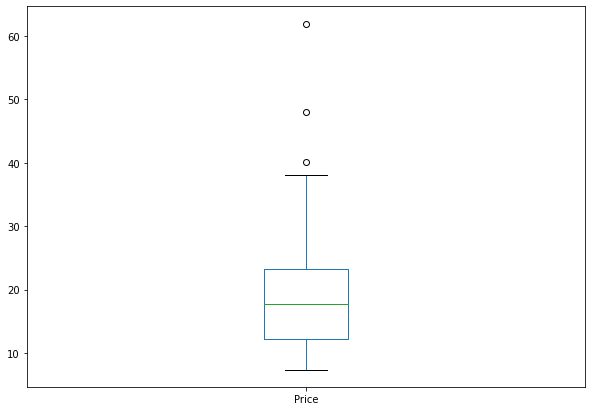

In [2]:
# for single variable: price
#creating a box plot for the variable 'Price'
cars_df["Price"].plot(kind="box",figsize = (10,7))

'''
Findings - 
It can be observed that, if the outliers are excluded, then:

minimum price of a car comes close to 10 thousand dollars and maximum price comes close to 40 thousand dollars

most cars are priced approximately between 11 thousand dollars to 22 thousand dollars
'''

plot( ) is a method of the DataFrame that takes a parameter 'kind' for displaying the appropriate visualisation. For example, the word 'box' is used to generate a box plot. Similarly, other visualisations are generated if values like bar, line, scatter, etc. are used as the 'kind' parameter

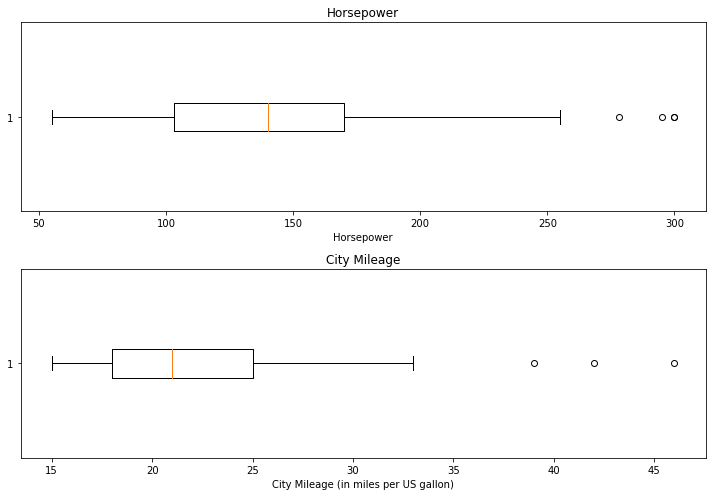

In [3]:
# multiple box plots
#The following lines enable us to use subplot funtionality
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figwidth(10)
fig.set_figheight(7)
#The following lines of code change the alignment from vertical to horizontal
ax1.boxplot(cars_df["Horsepower"],vert=False)
ax2.boxplot(cars_df["MPG.city"],vert=False)
#The following lines of code are used to add labels to axes and title to the graph
ax1.set_title('Horsepower')
ax1.set_xlabel('Horsepower')
ax2.set_title('City Mileage')
ax2.set_xlabel("City Mileage (in miles per US gallon)")

#In case of any superimposition of the subplots, the following functions caters the aesthetics
fig.tight_layout()

Text(0.5, 1.0, 'Van')

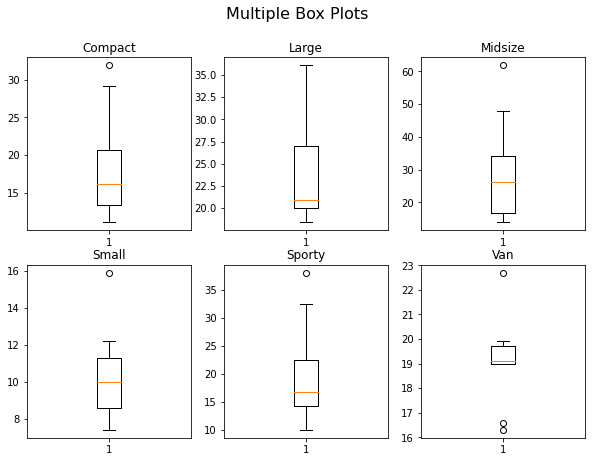

In [4]:
# price range for each type of car
# Setting up the partitions, length and width of the figure
fig, ax = plt.subplots(2, 3)
fig.set_figwidth(10)
fig.set_figheight(7)

#title
fig.suptitle("Multiple Box Plots", fontsize=16) 

#Accessing each partition[m][n] and providing the plot and its title
ax[0][0].boxplot(cars_df["Price"][cars_df["Type"]=="Compact"])
ax[0][0].set_title('Compact')
ax[0][1].boxplot(cars_df["Price"][cars_df["Type"]=="Large"])
ax[0][1].set_title('Large')
ax[0][2].boxplot(cars_df["Price"][cars_df["Type"]=="Midsize"])
ax[0][2].set_title('Midsize')
ax[1][0].boxplot(cars_df["Price"][cars_df["Type"]=="Small"])
ax[1][0].set_title('Small')
ax[1][1].boxplot(cars_df["Price"][cars_df["Type"]=="Sporty"])
ax[1][1].set_title('Sporty')
ax[1][2].boxplot(cars_df["Price"][cars_df["Type"]=="Van"])
ax[1][2].set_title('Van')

#'plt.subplots' method creates a grid-like system of dimensions 2x3 and returns the figure and axis objects using which, 
# individual subplots can be plotted. As it follows the zero-index system, the two-dimensional matrix style can be used 
# for accessing each subplot. Here, 'set_figwidth' and 'set_figheight' methods of the figure object achieve the desired 
# size of the figure and improve readability.

Text(0.5, 1, 'Prices of car according to car type')

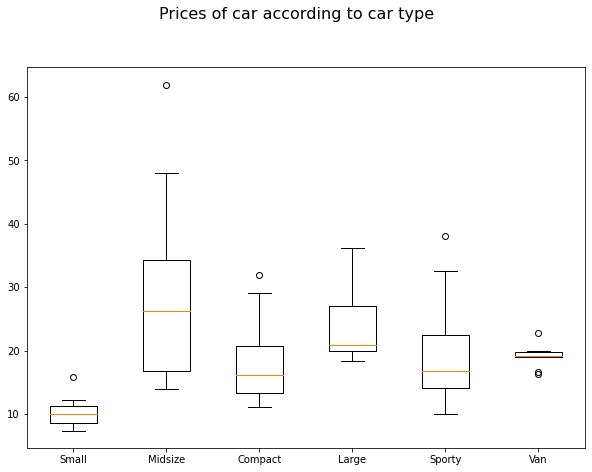

In [5]:
# for better comparison, lets put them on single canvas
#Finding the list of unique values of 'car type'
car_type_list = cars_df["Type"].unique()
#setting the width and height of the plot
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(7)
#creating a box plot for every unique car type
ax.boxplot([cars_df["Price"][cars_df["Type"]==k] for k in car_type_list])
#To set the position for each plots in the iteration
plt.xticks([i for i in range(1,len(car_type_list)+1)],[k for k in car_type_list])
#super-title
fig.suptitle("Prices of car according to car type", fontsize=16, y = 1)


'\nFindings - \nvans have the smallest price range, whereas midsize cars have the largest price range\n\nsmall cars have the lowest price, whereas large cars have the highest price\n\n'

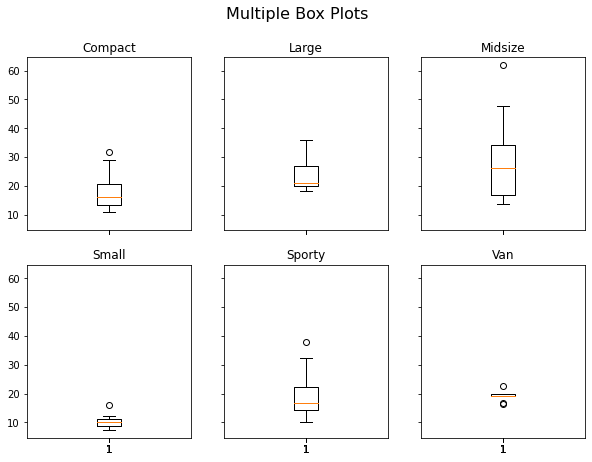

In [6]:
# using sharex and sharey attributes
#setting the plot, width and height
fig, ax = plt.subplots(2, 3, sharey=True, sharex=True)
fig.set_figwidth(10)
fig.set_figheight(7)

#super-title
fig.suptitle("Multiple Box Plots", fontsize=16)

#accessing and creating the respective sub-plots
ax[0][0].boxplot(cars_df["Price"][cars_df["Type"]=="Compact"])
ax[0][0].set_title('Compact')
ax[0][1].boxplot(cars_df["Price"][cars_df["Type"]=="Large"])
ax[0][1].set_title('Large')
ax[0][2].boxplot(cars_df["Price"][cars_df["Type"]=="Midsize"])
ax[0][2].set_title('Midsize')
ax[1][0].boxplot(cars_df["Price"][cars_df["Type"]=="Small"])
ax[1][0].set_title('Small')
ax[1][1].boxplot(cars_df["Price"][cars_df["Type"]=="Sporty"])
ax[1][1].set_title('Sporty')
ax[1][2].boxplot(cars_df["Price"][cars_df["Type"]=="Van"])
ax[1][2].set_title('Van')

'''
Findings - 
vans have the smallest price range, whereas midsize cars have the largest price range

small cars have the lowest price, whereas large cars have the highest price

'''

# Scatter Plot

Text(0.5, 1.0, 'Horsepower vs MPG.city')

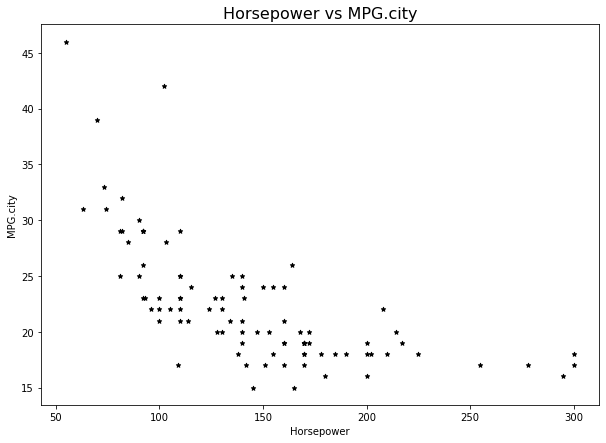

In [7]:
#To Plot the data as a scatter plot
ax = cars_df.plot(["Horsepower"],["MPG.city"],kind="scatter", color = "black",marker = "*",figsize=(10,7))
#To add labels and title to the output
ax.set_xlabel("Horsepower")	#sets label for x-axis
ax.set_ylabel("MPG.city")	#sets label for y-axis
ax.set_title("Horsepower vs MPG.city",fontsize=16)	#sets title for the graph


'\nFrom the scatter plot it can be understood that higher the horsepower, lower the milage of a car in a city. \nIt can also be deduced that vans give the least mileage in a city whereas small cars are the best fit though \nthey have the least horsepower.\n\n'

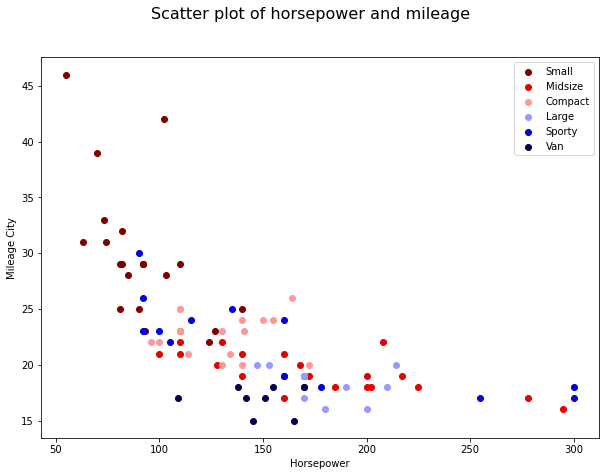

In [8]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)

colors = cm.seismic_r(np.linspace(0, 1, len(car_type_list))) # We extract the colours using the 'seismic_r' method. Here, 'r' indicates the reverse.

for car_type,c in zip(car_type_list,colors): 	# for every car type in the car_type_list we plot all the points in the scatter plot
    x = cars_df[cars_df["Type"] == car_type]["Horsepower"]
    y = cars_df[cars_df["Type"] == car_type]["MPG.city"]
    plt.scatter(x,y,color = c,label=car_type)

plt.suptitle("Scatter plot of horsepower and mileage",fontsize=16)
plt.xlabel("Horsepower")
plt.ylabel("Mileage City")
plt.legend()

'''
From the scatter plot it can be understood that higher the horsepower, lower the milage of a car in a city. 
It can also be deduced that vans give the least mileage in a city whereas small cars are the best fit though 
they have the least horsepower.

'''

# line chart
A line chart is a type of chart that displays information as a series of data points connected by straight line segments.



Text(0.5, 1.0, 'Mileage vs Horsepower')

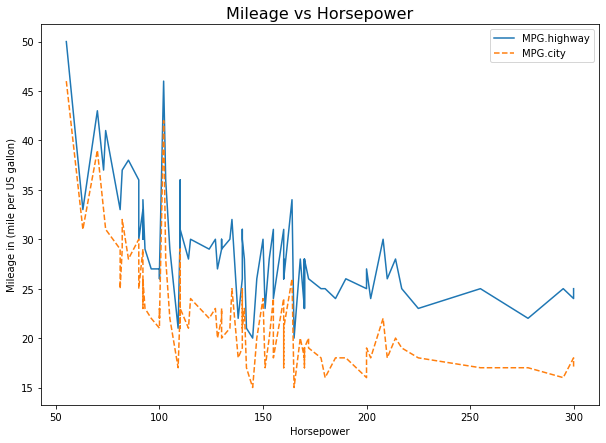

In [9]:
#First sort the data to get a proper line chart
cars_df=cars_df.sort_values(by="Horsepower")
#The following lines of code create a blank canvas to plot on
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(7)
#Data is fed and plotted using the following lines
cars_df.plot(ax = ax, x = "Horsepower", y = "MPG.highway", kind = "line", )  # plot method takes care of the colors
cars_df.plot(ax = ax, x = "Horsepower",y= "MPG.city", kind = "line", linestyle='--')

ax.set_ylabel("Mileage in (mile per US gallon)")
ax.set_title("Mileage vs Horsepower",fontsize=16)



You can notice that two line charts with the same axes are plotted, unlike the box plot where subplots 
created multiple boxes. To do this, the axis object, returned from the subplots( ) method is passed to both the line charts
using the 'ax' parameter. Note that the number of rows and columns have not been passed to the subplots method.



'\nIt can be observed that horsepower does not have a major impact on engine size. \nOn the other hand, it unpredictably affects RPM. The effects of high horsepower remain the same on mileage. \nAlthough mileage of a car in a city is affected a little more than its mileage on a highway.\n\n** to plot it vertically, interchange x and y axis\n'

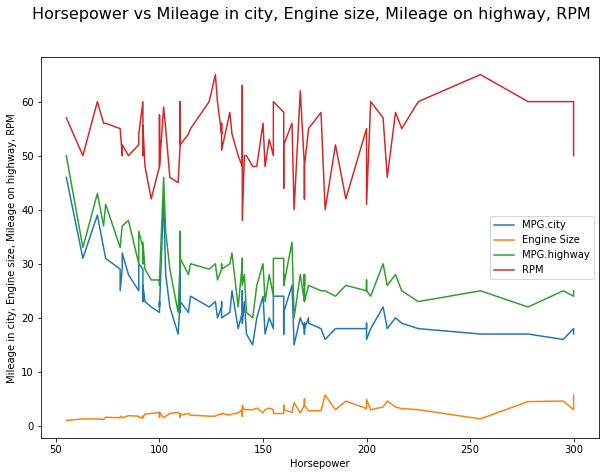

In [10]:
# Line Chart to compare multiple features
#First sort the data to get a proper line chart
cars_df=cars_df.sort_values(by="Horsepower")
#Plotting
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)
plt.plot(cars_df["Horsepower"], cars_df["MPG.city"],label="MPG.city")
plt.plot(cars_df["Horsepower"], cars_df["EngineSize"], label="Engine Size")
plt.plot(cars_df["Horsepower"], cars_df["MPG.highway"], label="MPG.highway")
plt.plot(cars_df["Horsepower"], [i/100 for i in cars_df["RPM"]],label="RPM") # RPM divided by 100 to maintain scale 
plt.suptitle("Horsepower vs Mileage in city, Engine size, Mileage on highway, RPM",fontsize=16)
plt.xlabel("Horsepower")
plt.ylabel("Mileage in city, Engine size, Mileage on highway, RPM")
plt.legend()

'''
It can be observed that horsepower does not have a major impact on engine size. 
On the other hand, it unpredictably affects RPM. The effects of high horsepower remain the same on mileage. 
Although mileage of a car in a city is affected a little more than its mileage on a highway.

** to plot it vertically, interchange x and y axis
'''

# Bar Chart
Box plot, scatter plot, or line chart fail when there is a need to plot both categorical and numerical data, 
as they can only take numerical data. Then, how to find relationships between such types of data? Which graph can be used?
The answer to the questions above is a bar chart or a bar graph. A bar chart takes in two features, 'x' and 'y' as inputs. 
'x' is the categorical data  plotted against 'y' which is the numerical data. 





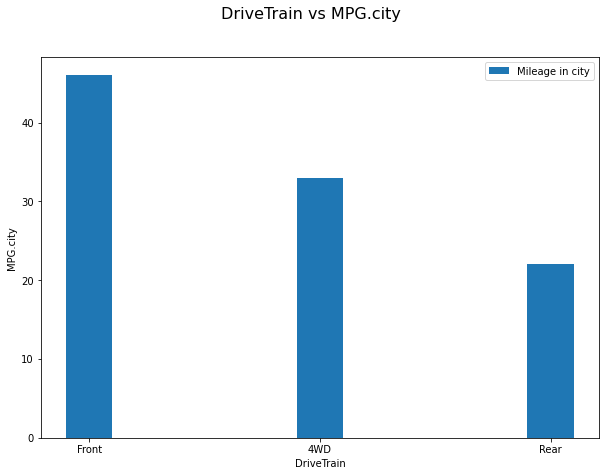

In [11]:
# a simple bar chart between 'DriveTrain' and 'MPG.city' along with the plot aesthetics
#width,height
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)
#code to create bar chart
plt.bar(cars_df["DriveTrain"], cars_df["MPG.city"],width=0.2,label="Mileage in city")
#cars_df.plot(x = "DriveTrain", y = "MPG.city", kind = "bar", width=2,label="Mileage in city")  # plot method takes care of the colors

#title and label
plt.suptitle("DriveTrain vs MPG.city",fontsize=16)
plt.xlabel("DriveTrain")
plt.ylabel("MPG.city")
#legend
plt.legend()



<AxesSubplot:xlabel='Passengers'>

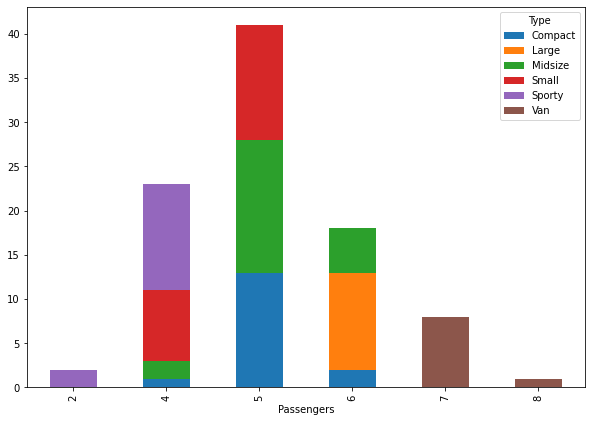

In [12]:
# Stackd Bar chart
#Use the following code snippet to filter the data and obtain the target columns into a separate dataframe.
grouped_data = cars_df[["Passengers","Type"]].groupby(by = ["Passengers","Type"]).size().unstack().reset_index()
# size() after groupby() returns the frequency for each 'Type'.
#  unstack() uses 'Passengers' as pivot
# reset_index() resets the index of the dataframe
grouped_data.plot(x = 'Passengers', kind = 'bar', stacked=True, figsize=(10,7))

# this shows different categories of cars with different passengers. 
# for example, for 2-passengers, only "sporty" car variant is available
# for 6 passengers seating, 3 variants of cars are available

# Pie Chart
A pie chart is suitable to show the proportional distribution of items within the same category.

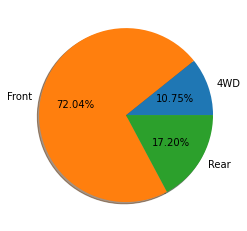

In [13]:

grouped_data1 = cars_df[["DriveTrain"]].groupby(by = ["DriveTrain"]).size()
plt.pie(grouped_data1, labels = grouped_data1.index, autopct = "%.2f%%", shadow = True)
plt.show()

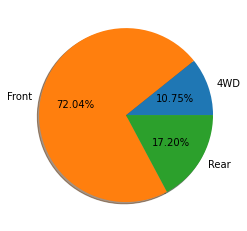

In [14]:
grouped_data2 = cars_df.groupby(by = ["DriveTrain"]).size()
plt.pie(grouped_data2, labels = grouped_data2.index, autopct = "%.2f%%", shadow = True)
plt.show()

In [15]:
cars_df["Cylinders"].unique()


array(['3', '4', '5', '6', '8', 'rotary'], dtype=object)

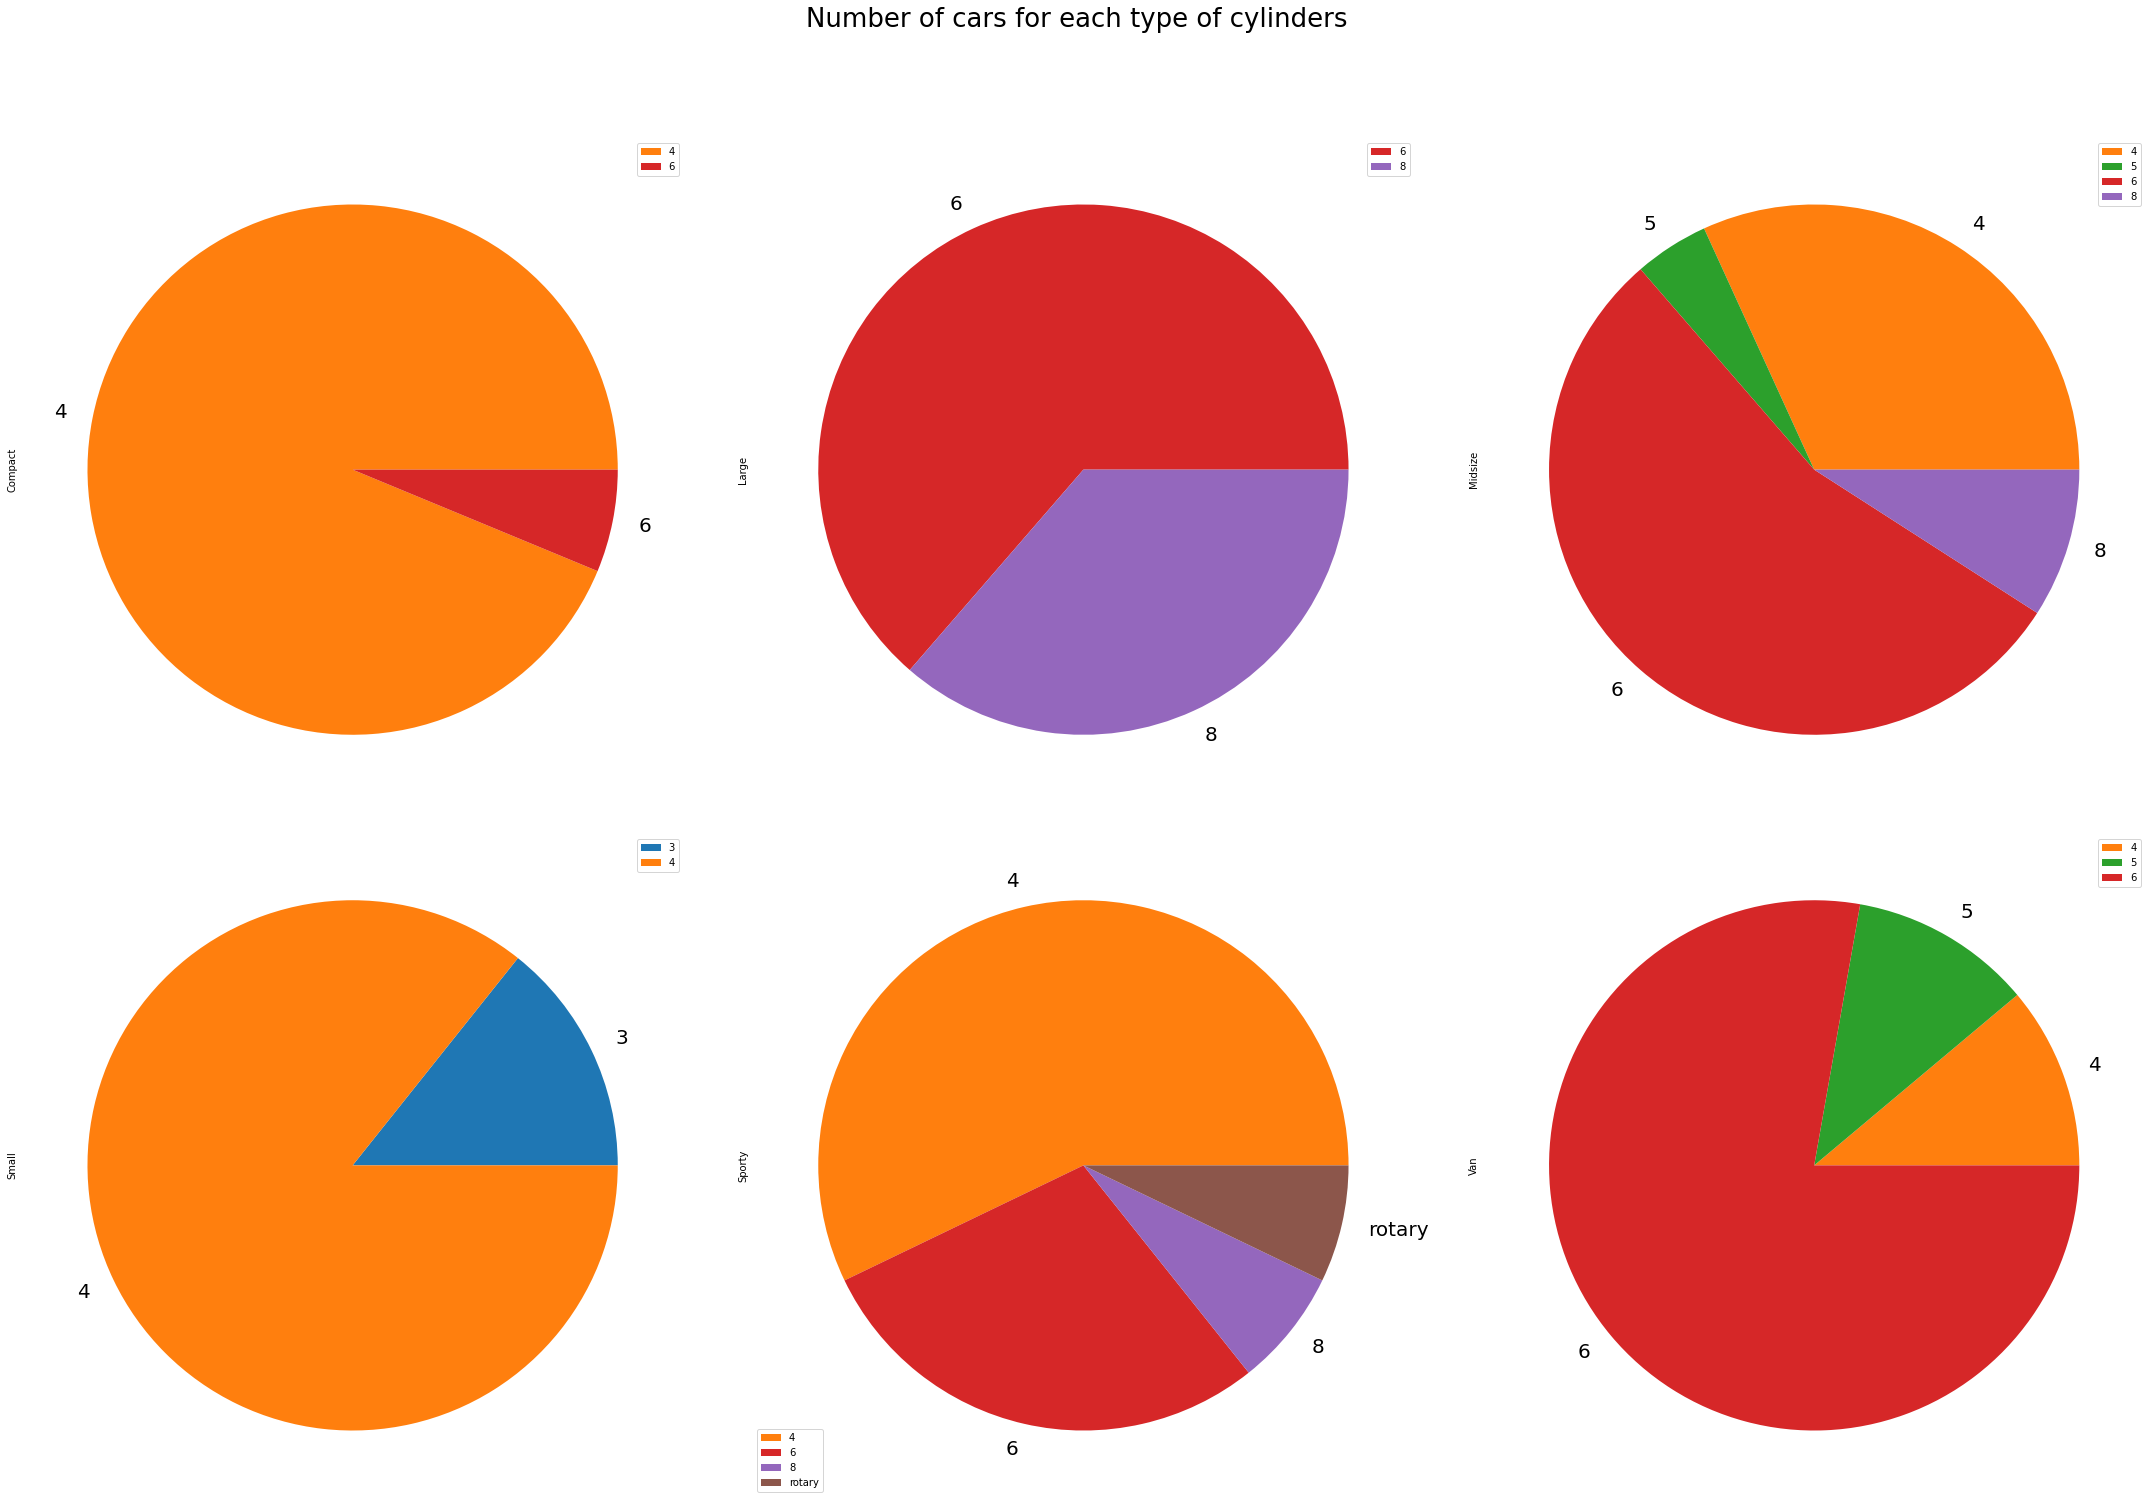

In [16]:
# The data is grouped on 'Cylinders' and 'Type' using the groupby() method
grouped_data = cars_df[["Cylinders", "Type"]].groupby(by = ["Cylinders", "Type"]).size().unstack()
fig, ax = plt.subplots(2,3, figsize = (15,10))

# The pie() method returns patches, texts, and autotexts. Patches control individual slices of the pie chart.  
grouped_data.plot.pie(ax = ax, subplots = True, fontsize = 20)
fig.suptitle("Number of cars for each type of cylinders", fontsize=26, x = 1, y = 2.1)

# The 'tight_layout' is used to create a rectangle. The 'rect' feature takes in a list of values that 
# represent the sides of the rectangle in the following order: left  bottom  right  top
fig.tight_layout(rect=[0,0,2,2])



Parameters like explode, legend, autopct, etc. can be used to make a pie chart more informative.  The 'legend' parameter is an area describing the elements of the graph. It shows what data each slice is representing; like in this scenario, the legend is representing the number of cylinders each type of car contains. 
* https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/

# Histogram
A histogram shows the distribution of numeric data through a continuous interval by segmenting data into different bins. 
  Useful for inspecting skewness in the data.

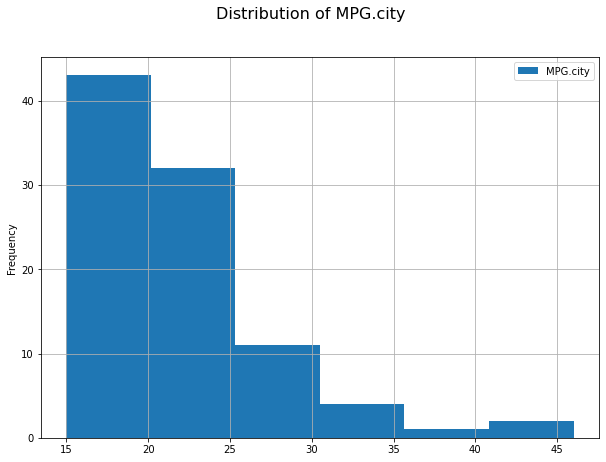

In [17]:
cars_df["MPG.city"].plot(kind="hist", grid=True, figsize=(10,7), bins=6)
plt.suptitle("Distribution of MPG.city", fontsize=16)
plt.legend()


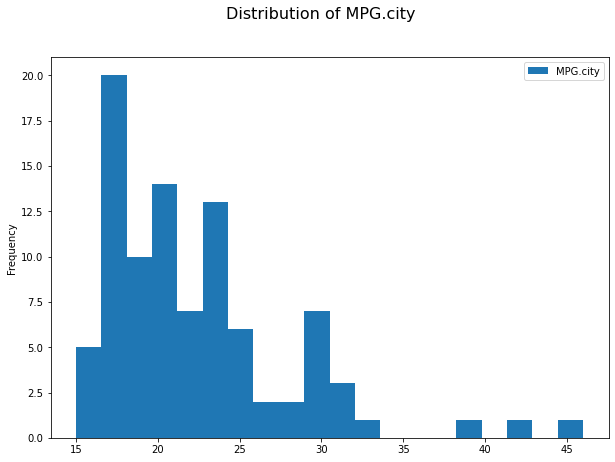

In [18]:
cars_df["MPG.city"].plot(kind="hist", bins=20, figsize=(10,7))
plt.suptitle("Distribution of MPG.city", fontsize=16)
plt.legend()


(14.0, 50.0)

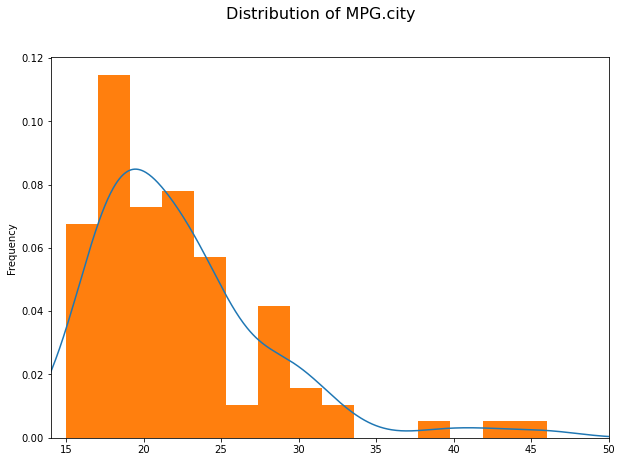

In [19]:
# The 'kind = density' parameter plots the density line of the data.
cars_df["MPG.city"].plot(kind="density")

# A probability density plot can be created by making a histogram smooth and continuous using an estimation function. 
# It can be useful in visualising 'shape' of the data as a continuous replacement for a discrete histogram
cars_df["MPG.city"].plot(kind="hist",bins=15,density=True,figsize=(10,7))

#'density = True' parameter returns the probability densities of each bar of the histogram. 


plt.suptitle("Distribution of MPG.city",fontsize=16)

# xlim( ) method is used to set the limit of the axis between 14 and 50, as shown in the code below:
plt.xlim(14,50)



# Word cloud

In [28]:
#Wordcloud is a separate library used to handle the plotting of text into an image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
#Reading the data
phone_df = pd.read_csv("IPhoneReview.csv",encoding='latin') 
phone_df

,Unnamed: 0,Date,Review,UserName
0,0,16 Jan 2018,"mir, 16 Jan 2018My Huawei Mate 10 Pro is alrea...",Mr No
1,1,16 Jan 2018,This month it fell from 1149Â? to 999Â? in Ger...,Anonymous
2,2,16 Jan 2018,"chopp, 16 Jan 2018hey guys iam confused betwee...",Anonymous
3,3,16 Jan 2018,"chopp, 16 Jan 2018hey guys iam confused betwee...",Tony
4,4,16 Jan 2018,hey guys iam confused between buying iphone x ...,Anonymous
...,...,...,...,...
1995,1995,12 Sep 2017,Funny how Android guys react to this phone and...,Anonymous
1996,1996,12 Sep 2017,This is the most ugly phone i have ever seen. ...,Daniel M.
1997,1997,12 Sep 2017,No Headphone jack. PPI < 500. For a flagship W...,Anonymous
1998,1998,12 Sep 2017,no fingerprint sensor :)),alex


In [29]:
#The following part of code helps to concatenate the text of the relevant column into a single string
word_string = ''
stopwords = set(STOPWORDS)
for comments in phone_df.Review.values:
    word_string = word_string + comments
wordcloud = WordCloud(background_color='white',stopwords=stopwords).generate(word_string)


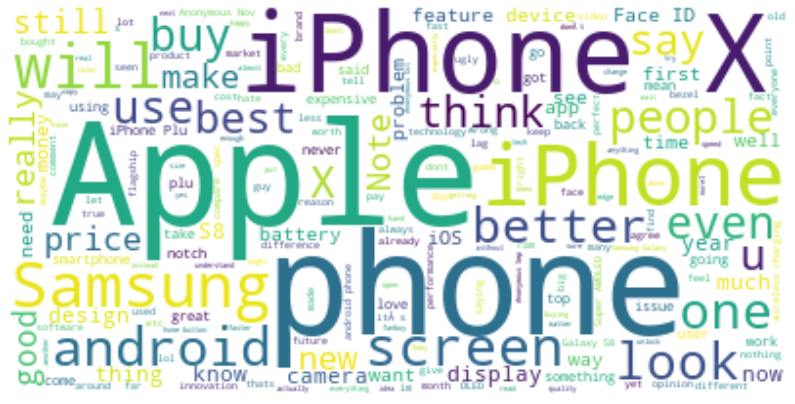

In [30]:
#Creating the canvas
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
#Plotting the Wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [31]:
#To add more words to the list of stopwords.
stopwords.add('phone')
stopwords.add('iPhone')


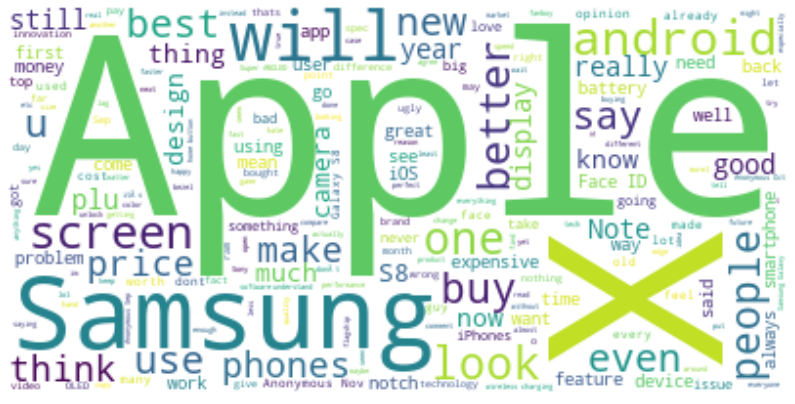

In [32]:
#Alternatively generating the wordcloud first 
wordcloud.generate(word_string)
#Now displaying the cloud
fig = plt.figure()
fig.set_figwidth(14) 
fig.set_figheight(18) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')#Since we do not need labels on axes for a Wordcloud
plt.show()


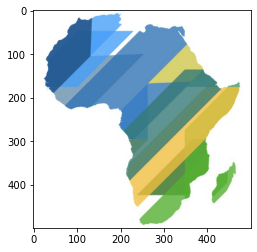

In [33]:
# The shape of a word cloud can be changed. 

#importing necessary libraries
from skimage.io import imread
from skimage import data_dir
#reading an image to set the custom outline of Wordcloud
cloud = imread('maskingImage.jpeg')
plt.imshow(cloud)


<function matplotlib.pyplot.show(close=None, block=None)>

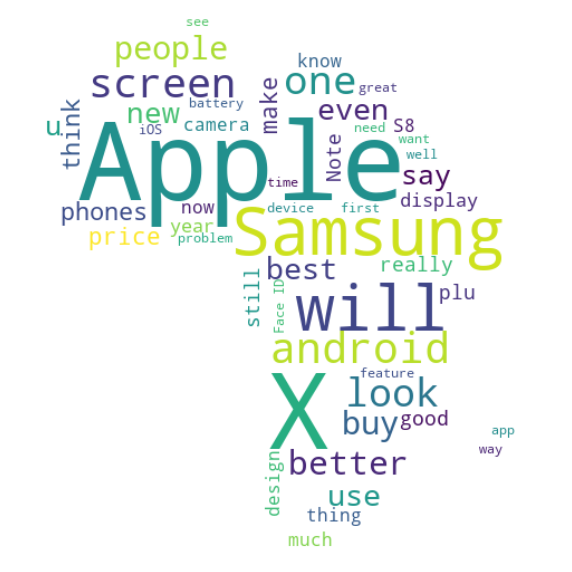

In [34]:
#plotting the custom Wordcloud
wc1 = WordCloud(stopwords=stopwords,max_words=50,background_color='white',mask = cloud)
wc1.generate(word_string)
fig = plt.figure()
fig.set_figwidth(10) 
fig.set_figheight(16) 
plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.show


references - https://www.analyticsvidhya.com/blog/2020/02/beginner-guide-matplotlib-data-visualization-exploration-python/
             https://towardsdatascience.com/create-word-cloud-into-any-shape-you-want-using-python-d0b88834bc32
             https://www.w3schools.com/python/matplotlib_pie_charts.asp